In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
N_HDFS_TEMPLATES = 34
N_BGL_TEMPLATES = 402
N_OPENSTACK_TEMPLATES = 93

In [3]:
def create_feature_vectors(df, n_templates, event_col_idx=1):
    """
    Create feature vectors using the last occurrence position of each event.
    
    Args:
        df: DataFrame with sequences in the second column (index 1)
        n_templates: Number of event templates
        event_col_idx: Index of the column containing event sequences
    
    Returns:
        numpy array of shape (n_samples, n_templates)
    """
    n_samples = len(df)
    features = np.zeros((n_samples, n_templates), dtype=int)

    for i, sequence in enumerate(df.iloc[:, event_col_idx]):
        # Parse the sequence string
        events = list(map(int, str(sequence).split()))

        # For each event, record its last occurrence position
        for position, event in enumerate(events):
            if 0 <= event < n_templates:
                features[i, event] = position + 1  # 1-indexed position
    # for i, sequence in enumerate(df.iloc[:, event_col_idx]):
    #     # Parse the sequence string into integers
    #     events = list(map(int, str(sequence).split()))
    # 
    #     # Count occurrences of each event
    #     for event in events:
    #         if 0 <= event < n_templates:
    #             features[i, event] += 1
                
    return features


### HDFS

In [4]:
df_hdfs_train = pd.read_csv('hdfs_loghub/hdfs_train', header=None, names=['block_id', 'sequence'])
df_hdfs_test_normal = pd.read_csv('hdfs_loghub/hdfs_test_normal', header=None, names=['block_id', 'sequence'])
df_hdfs_test_abnormal = pd.read_csv('hdfs_loghub/hdfs_test_abnormal', header=None, names=['block_id', 'sequence'])
df_hdfs_test_abnormal.head()

,block_id,sequence
0,blk_-3544583377289625738,5 22 5 5 11 9 11 9 11 9 3 26 26 26 3 3 3 3 3 3...
1,blk_-8531310335568756456,5 22 5 5 11 9 11 9 11 9 26 26 26 2 2 2 4 4 4 4...
2,blk_3947106522258141922,5 5 22 5 11 9 11 9 26 26 11 9 26 2 2 2 4 4 4 4...
3,blk_7956543127401791181,5 5 22 5 9 11 9 26 26 11 9 11 26 2 2 2 4 3 4 4...
4,blk_-3102267849859399193,5 5 22 7 11 10 14 7


In [5]:
df_hdfs_test_normal['label'] = 0
df_hdfs_test_abnormal['label'] = 1
df_hdfs_test = pd.concat([df_hdfs_test_normal, df_hdfs_test_abnormal], axis=0, ignore_index=True)
df_hdfs_test = df_hdfs_test.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Training data shape: {df_hdfs_train.shape}")
print(f"Test data shape: {df_hdfs_test.shape}")
print(f"Fraction of normal samples in test data: {(df_hdfs_test['label'] == 0).mean():.2f}")

Training data shape: (111645, 2)
Test data shape: (463416, 3)
Fraction of normal samples in test data: 0.96


In [6]:
X_train_hdfs = create_feature_vectors(df_hdfs_train, N_HDFS_TEMPLATES)
X_test_hdfs = create_feature_vectors(df_hdfs_test, N_HDFS_TEMPLATES)
y_test_hdfs = df_hdfs_test['label'].values

X_test_hdfs, X_cal_hdfs, y_test_hdfs, y_cal_hdfs = train_test_split(
    X_test_hdfs, y_test_hdfs, test_size=0.02, random_state=42, stratify=y_test_hdfs
)

print(f"\nX_train_hdfs shape: {X_train_hdfs.shape}")
print(f"X_test_hdfs shape: {X_test_hdfs.shape}, y_test_hdfs shape: {y_test_hdfs.shape}")
print(f"X_cal_hdfs shape: {X_cal_hdfs.shape}, y_cal_hdfs shape: {y_cal_hdfs.shape}")
print(f"Fraction normal in test: {(y_test_hdfs == 0).mean():.2f}")
print(f"Fraction normal in calibration: {(y_cal_hdfs == 0).mean():.2f}")


X_train_hdfs shape: (111645, 34)
X_test_hdfs shape: (454147, 34), y_test_hdfs shape: (454147,)
X_cal_hdfs shape: (9269, 34), y_cal_hdfs shape: (9269,)
Fraction normal in test: 0.96
Fraction normal in calibration: 0.96


### BGL

In [7]:
df_bgl_train = pd.read_csv('bgl_loghub/bgl_train', header=None, names=['block_id', 'sequence'])
df_bgl_test_normal = pd.read_csv('bgl_loghub/bgl_test_normal', header=None, names=['block_id', 'sequence'])
df_bgl_test_abnormal = pd.read_csv('bgl_loghub/bgl_test_abnormal', header=None, names=['block_id', 'sequence'])
df_bgl_test_abnormal.head()

,block_id,sequence
0,R02-M1-N0-C:J12-U11,189 189 189 189 189 189 189 189 189 189 189 18...
1,R20-M1-N5-C:J17-U01,168 6 168 168 168 168 168 168 168 168 168 168 ...
2,R20-M1-NF-C:J13-U01,168 6 168 168 15 168 168 168 168 168 168 168 1...
3,R20-M1-N9-C:J17-U01,168 6 168 168 168 168 168 168 168 168 98 187 9...
4,R24-M1-N6-C:J11-U11,168 6 168 168 168 168 168 168 168 168 168 168 ...


In [8]:
df_bgl_test_normal['label'] = 0
df_bgl_test_abnormal['label'] = 1
df_bgl_test = pd.concat([df_bgl_test_normal, df_bgl_test_abnormal], axis=0, ignore_index=True)
df_bgl_test = df_bgl_test.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Training data shape: {df_bgl_train.shape}")
print(f"Test data shape: {df_bgl_test.shape}")
print(f"Fraction of normal samples in test data: {(df_bgl_test['label'] == 0).mean():.2f}")

Training data shape: (7576, 2)
Test data shape: (61676, 3)
Fraction of normal samples in test data: 0.49


In [9]:
X_train_bgl = create_feature_vectors(df_bgl_train, N_BGL_TEMPLATES)
X_test_bgl = create_feature_vectors(df_bgl_test, N_BGL_TEMPLATES)
y_test_bgl = df_bgl_test['label'].values

X_test_bgl, X_cal_bgl, y_test_bgl, y_cal_bgl = train_test_split(
    X_test_bgl, y_test_bgl, test_size=0.15, random_state=42, stratify=y_test_bgl
)

print(f"\nX_train_bgl shape: {X_train_bgl.shape}")
print(f"X_test_bgl shape: {X_test_bgl.shape}, y_test_bgl shape: {y_test_bgl.shape}")
print(f"X_cal_bgl shape: {X_cal_bgl.shape}, y_cal_bgl shape: {y_cal_bgl.shape}")
print(f"Fraction normal in test: {(y_test_bgl == 0).mean():.2f}")
print(f"Fraction normal in calibration: {(y_cal_bgl == 0).mean():.2f}")


X_train_bgl shape: (7576, 402)
X_test_bgl shape: (52424, 402), y_test_bgl shape: (52424,)
X_cal_bgl shape: (9252, 402), y_cal_bgl shape: (9252,)
Fraction normal in test: 0.49
Fraction normal in calibration: 0.49


### Openstack

In [10]:
df_openstack_train = pd.read_csv('openstack_parisakalaki/openstack_train', header=None, names=['block_id', 'sequence'])
df_openstack_test_normal = pd.read_csv('openstack_parisakalaki/openstack_test_normal', header=None,
                                       names=['block_id', 'sequence'])
df_openstack_test_abnormal = pd.read_csv('openstack_parisakalaki/openstack_test_abnormal', header=None,
                                         names=['block_id', 'sequence'])
df_openstack_test_abnormal.head()

,block_id,sequence
0,afcf8235-2a42-4a95-8f6c-ee9c70d41f09,59 3 79 11 8 4 5 14 80 13 52
1,f9e1e6e6-aec6-40de-bc1f-3dc4c3853a24,59 3 22 22 20 20 7 7 21 21 9 15 7 7 12 7 81 11...
2,e40df018-70ba-41b9-8b49-af06d53811cb,59 78 83 85 84 13 52
3,d7be2cb6-b250-4e30-809a-d723055e4d53,65 69 72 8 11 8 4 5 14 13 52
4,c40ebc56-de3d-419f-91d8-c441e0efb4e7,59 3 22 22 22 22 20 20 20 20 70 7 7 7 7 70 23 ...


In [11]:
df_openstack_test_normal['label'] = 0
df_openstack_test_abnormal['label'] = 1
df_openstack_test = pd.concat([df_openstack_test_normal, df_openstack_test_abnormal], axis=0, ignore_index=True)
df_openstack_test = df_openstack_test.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Training data shape: {df_openstack_train.shape}")
print(f"Test data shape: {df_openstack_test.shape}")
print(f"Fraction of normal samples in test data: {(df_openstack_test['label'] == 0).mean():.2f}")

Training data shape: (989, 2)
Test data shape: (4607, 3)
Fraction of normal samples in test data: 0.86


In [12]:
X_train_openstack = create_feature_vectors(df_openstack_train, N_OPENSTACK_TEMPLATES)
X_test_openstack = create_feature_vectors(df_openstack_test, N_OPENSTACK_TEMPLATES)
y_test_openstack = df_openstack_test['label'].values

X_test_openstack, X_cal_openstack, y_test_openstack, y_cal_openstack = train_test_split(
    X_test_openstack, y_test_openstack, test_size=0.3, random_state=42, stratify=y_test_openstack
)

print(f"\nX_train_openstack shape: {X_train_openstack.shape}")
print(f"X_test_openstack shape: {X_test_openstack.shape}, y_test_openstack shape: {y_test_openstack.shape}")
print(f"X_cal_openstack shape: {X_cal_openstack.shape}, y_cal_openstack shape: {y_cal_openstack.shape}")
print(f"Fraction normal in test: {(y_test_openstack == 0).mean():.2f}")
print(f"Fraction normal in calibration: {(y_cal_openstack == 0).mean():.2f}")


X_train_openstack shape: (989, 93)
X_test_openstack shape: (3224, 93), y_test_openstack shape: (3224,)
X_cal_openstack shape: (1383, 93), y_cal_openstack shape: (1383,)
Fraction normal in test: 0.86
Fraction normal in calibration: 0.86


## Evaluation

In [13]:
def reconstruction_error(X, R, mean):
    """
    Compute reconstruction error: e(x) = ||R(x - mean)||^2
    """
    X_centered = X - mean
    errors = np.sum((X_centered @ R) ** 2, axis=1)
    return errors


def predictor(X, R, mean, tau):
    """
    Predictor h_tau(x) based on reconstruction error threshold.
    """
    errors = reconstruction_error(X, R, mean)
    return (errors > tau).astype(int)


def find_optimal_threshold(X_cal, y_cal, R, mean):
    """
    Find optimal threshold tau by minimizing classification error on calibration set.
    """
    errors = reconstruction_error(X_cal, R, mean)

    thresholds = np.percentile(errors, np.linspace(0, 100, 1000))

    best_tau = None
    best_accuracy = 0

    for tau in thresholds:
        predictions = predictor(X_cal, R, mean, tau)
        accuracy = np.mean(predictions == y_cal)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_tau = tau

    return best_tau


def asymptotic_optimal_threshold(X_cal, y_cal, R, mean):
    """
    Calculate asymptotic optimal threshold using Theorem 3 (Gaussian mixture model).
    Returns the threshold from the quadratic solution that minimizes loss on X_cal.
    
    Args:
        X_cal: Calibration data of shape (n_samples, d)
        y_cal: Calibration labels of shape (n_samples,)
        R: Complementary projection matrix of shape (d, d)
        mean: Mean vector of shape (d,)
    
    Returns:
        Asymptotic optimal threshold tau* that minimizes calibration loss
    """
    # Separate normal and abnormal samples
    X_normal = X_cal[y_cal == 0]
    X_abnormal = X_cal[y_cal == 1]
    
    # Calculate empirical means
    mu1 = np.mean(X_normal, axis=0)
    mu2 = np.mean(X_abnormal, axis=0)
    Delta = mu2 - mu1
    
    # Calculate empirical covariance matrices
    Sigma1 = np.cov(X_normal, rowvar=False)
    Sigma2 = np.cov(X_abnormal, rowvar=False)
    
    # Fraction of normal samples
    alpha = np.sum(y_cal == 0) / len(y_cal)
    
    # Gaussian approximation parameters
    mu_prime_1 = np.trace(R @ Sigma1)
    sigma_prime_1_sq = 2 * np.trace(R @ Sigma1 @ R @ Sigma1)
    
    mu_prime_2 = np.trace(R @ Sigma2) + np.linalg.norm(R @ Delta)**2
    sigma_prime_2_sq = 2 * np.trace(R @ Sigma2 @ R @ Sigma2) + 4 * Delta.T @ R @ Sigma2 @ R @ Delta
    
    sigma_prime_1 = np.sqrt(sigma_prime_1_sq)
    sigma_prime_2 = np.sqrt(sigma_prime_2_sq)
    
    # Coefficients for quadratic equation A*tau^2 + B*tau + C = 0
    A = 1/sigma_prime_2_sq - 1/sigma_prime_1_sq
    B = 2*mu_prime_1/sigma_prime_1_sq - 2*mu_prime_2/sigma_prime_2_sq
    C = (mu_prime_2**2/sigma_prime_2_sq - mu_prime_1**2/sigma_prime_1_sq + 
         2*np.log((alpha * sigma_prime_2) / ((1 - alpha) * sigma_prime_1)))
    
    # Solve quadratic equation
    discriminant = B**2 - 4*A*C
    
    if discriminant < 0:
        print("Warning: No real solution for asymptotic threshold")
        return None
    
    tau1 = (-B + np.sqrt(discriminant)) / (2*A)
    tau2 = (-B - np.sqrt(discriminant)) / (2*A)
    
    # # Evaluate both solutions on calibration set and choose the one with lower loss
    # candidates = []
    # for tau_candidate in [tau1, tau2]:
    #     if tau_candidate > 0:
    #         y_pred = predictor(X_cal, R, mean, tau_candidate)
    #         loss = np.mean(y_pred != y_cal)
    #         candidates.append((tau_candidate, loss))
    # 
    # if not candidates:
    #     print("Warning: No positive solution for asymptotic threshold")
    #     return None
    # 
    # # Return the threshold with minimum loss on calibration set
    # best_tau, best_loss = min(candidates, key=lambda x: x[1])
    # return best_tau
    # Desired interval between mu1' and mu2'
    low = min(mu_prime_1, mu_prime_2)
    high = max(mu_prime_1, mu_prime_2)

    # Keep only the taus in the interval (mu1', mu2')
    taus_in_interval = [tau for tau in (tau1, tau2) if low < tau < high]

    if len(taus_in_interval) == 1:
        return taus_in_interval[0]      # the correct τ

    elif len(taus_in_interval) > 1:
        # If both are inside, return the midpoint one (rare case)
        return sorted(taus_in_interval, key=lambda t: abs(t - (low + high)/2))[0]

    else:
        print("Warning: No tau lies between mu1' and mu2'")
        return None

def calculate_generalization_bound(X_cal, y_cal, R, mean, tau, delta=0.05):
    """
    Calculate generalization bound on test error given calibration set performance.
    
    With probability at least 1 - delta:
    L_{0-1}(tau) <= L_hat_S(tau) + sqrt(log(6/delta)/(2c)) + 
                     alpha_hat * sqrt(log(6/delta)/(2c_1)) + 
                     (1-alpha_hat) * sqrt(log(6/delta)/(2c_2))
    """
    # Calculate empirical loss on calibration set
    y_pred_cal = predictor(X_cal, R, mean, tau)
    L_hat_S = np.mean(y_pred_cal != y_cal)
    
    # Sample sizes
    c = len(y_cal)  # Total calibration samples
    c1 = np.sum(y_cal == 0)  # Normal samples
    c2 = np.sum(y_cal == 1)  # Abnormal samples
    alpha_hat = c1 / c  # Fraction of normal samples
    
    # Bound terms
    log_term = np.log(6 / delta)
    
    term1 = np.sqrt(log_term / (2 * c))
    term2 = alpha_hat * np.sqrt(log_term / (2 * c1))
    term3 = (1 - alpha_hat) * np.sqrt(log_term / (2 * c2))
    
    # Total upper bound
    upper_bound = L_hat_S + term1 + term2 + term3
    
    return {
        'L_hat_S': L_hat_S,
        'term1': term1,
        'term2': term2,
        'term3': term3,
        'upper_bound': upper_bound,
        'c': c,
        'c1': c1,
        'c2': c2,
        'alpha_hat': alpha_hat,
        'delta': delta
    }

In [14]:
pca_hdfs = PCA()
pca_hdfs.fit(X_train_hdfs)
print(f"\nPCA trained on HDFS. Explained variance ratio shape: {pca_hdfs.explained_variance_ratio_.shape}")

# Choose k components (example: k for 95% variance)
cumsum_hdfs = np.cumsum(pca_hdfs.explained_variance_ratio_)
k_hdfs = np.argmax(cumsum_hdfs >= 0.95) + 2
print(f"Using k={k_hdfs} components for 95% explained variance")

V_k_hdfs = pca_hdfs.components_[:k_hdfs].T

# P_k: orthogonal projection matrix P_k = V_k V_k^T
# Shape: (d, d), rank k
P_k_hdfs = V_k_hdfs @ V_k_hdfs.T
print(f"Projection matrix P_k_hdfs shape: {P_k_hdfs.shape}, rank: {k_hdfs}")

# R: complementary projection R = I_d - P_k
# Shape: (d, d), rank m = d - k
I_d_hdfs = np.eye(P_k_hdfs.shape[0])
R_hdfs = I_d_hdfs - P_k_hdfs
print(f"Complementary projection R_hdfs shape: {R_hdfs.shape}, rank: {P_k_hdfs.shape[0] - k_hdfs}")

# Mean of training data
mean_hdfs = pca_hdfs.mean_


PCA trained on HDFS. Explained variance ratio shape: (34,)
Using k=5 components for 95% explained variance
Projection matrix P_k_hdfs shape: (34, 34), rank: 5
Complementary projection R_hdfs shape: (34, 34), rank: 29


In [15]:
pca_bgl = PCA()
pca_bgl.fit(X_train_bgl)
print(f"\nPCA trained on BGL. Explained variance ratio shape: {pca_bgl.explained_variance_ratio_.shape}")

cumsum_bgl = np.cumsum(pca_bgl.explained_variance_ratio_)
k_bgl = np.argmax(cumsum_bgl >= 0.95) + 2
print(f"Using k={k_bgl} components for 95% explained variance")

V_k_bgl = pca_bgl.components_[:k_bgl].T
P_k_bgl = V_k_bgl @ V_k_bgl.T
print(f"Projection matrix P_k_bgl shape: {P_k_bgl.shape}, rank: {k_bgl}")

I_d_bgl = np.eye(P_k_bgl.shape[0])
R_bgl = I_d_bgl - P_k_bgl
print(f"Complementary projection R_bgl shape: {R_bgl.shape}, rank: {P_k_bgl.shape[0] - k_bgl}")

mean_bgl = pca_bgl.mean_


PCA trained on BGL. Explained variance ratio shape: (402,)
Using k=2 components for 95% explained variance
Projection matrix P_k_bgl shape: (402, 402), rank: 2
Complementary projection R_bgl shape: (402, 402), rank: 400


In [16]:
pca_openstack = PCA()
pca_openstack.fit(X_train_openstack)
print(f"\nPCA trained on OpenStack. Explained variance ratio shape: {pca_openstack.explained_variance_ratio_.shape}")

# Create projection matrices for OpenStack
cumsum_openstack = np.cumsum(pca_openstack.explained_variance_ratio_)
k_openstack = np.argmax(cumsum_openstack >= 0.95) + 2
print(f"Using k={k_openstack} components for 95% explained variance")

V_k_openstack = pca_openstack.components_[:k_openstack].T
P_k_openstack = V_k_openstack @ V_k_openstack.T
print(f"Projection matrix P_k_openstack shape: {P_k_openstack.shape}, rank: {k_openstack}")

I_d_openstack = np.eye(P_k_openstack.shape[0])
R_openstack = I_d_openstack - P_k_openstack
print(f"Projection matrix P_k_openstack shape: {P_k_openstack.shape}, rank: {k_openstack}")

mean_openstack = pca_openstack.mean_


PCA trained on OpenStack. Explained variance ratio shape: (93,)
Using k=7 components for 95% explained variance
Projection matrix P_k_openstack shape: (93, 93), rank: 7
Projection matrix P_k_openstack shape: (93, 93), rank: 7


In [17]:
tau_hdfs = find_optimal_threshold(X_cal_hdfs, y_cal_hdfs, R_hdfs, mean_hdfs)
print(f"Optimal threshold tau_hdfs: {tau_hdfs:.4f}")

Optimal threshold tau_hdfs: 237.8547


In [18]:
tau_asymptotic_hdfs = asymptotic_optimal_threshold(X_cal_hdfs, y_cal_hdfs, R_hdfs, mean_hdfs)
if tau_asymptotic_hdfs is not None:
    print(f"Asymptotic optimal threshold tau*_hdfs: {tau_asymptotic_hdfs:.4e}")
    print(f"Ratio (asymptotic/empirical): {tau_asymptotic_hdfs/tau_hdfs:.4f}")

Asymptotic optimal threshold tau*_hdfs: 3.3530e+01
Ratio (asymptotic/empirical): 0.1410


In [19]:
y_pred_hdfs = predictor(X_test_hdfs, R_hdfs, mean_hdfs, tau_hdfs)
loss_01_hdfs = np.mean(y_pred_hdfs != y_test_hdfs)
print(f"0-1 Loss on HDFS test set: {loss_01_hdfs:.4f} ({loss_01_hdfs * 100:.2f}%)")

0-1 Loss on HDFS test set: 0.0077 (0.77%)


In [20]:
if tau_asymptotic_hdfs is not None:
    y_pred_asymptotic_hdfs = predictor(X_test_hdfs, R_hdfs, mean_hdfs, tau_asymptotic_hdfs)
    loss_01_asymptotic_hdfs = np.mean(y_pred_asymptotic_hdfs != y_test_hdfs)
    print(f"0-1 Loss on HDFS test set (asymptotic): {loss_01_asymptotic_hdfs:.4f} ({loss_01_asymptotic_hdfs*100:.2f}%)")

0-1 Loss on HDFS test set (asymptotic): 0.0200 (2.00%)


In [21]:
tau_bgl = find_optimal_threshold(X_cal_bgl, y_cal_bgl, R_bgl, mean_bgl)
print(f"Optimal threshold tau_bgl: {tau_bgl:.4f}")

Optimal threshold tau_bgl: 1077.6192


In [22]:
tau_asymptotic_bgl = asymptotic_optimal_threshold(X_cal_bgl, y_cal_bgl, R_bgl, mean_bgl)
if tau_asymptotic_bgl is not None:
    print(f"Asymptotic optimal threshold tau*_bgl: {tau_asymptotic_bgl:.4e}")
    print(f"Ratio (asymptotic/empirical): {tau_asymptotic_bgl/tau_bgl:.4f}")

Asymptotic optimal threshold tau*_bgl: 2.4731e+04
Ratio (asymptotic/empirical): 22.9498


In [23]:
y_pred_bgl = predictor(X_test_bgl, R_bgl, mean_bgl, tau_bgl)
loss_01_bgl = np.mean(y_pred_bgl != y_test_bgl)
print(f"0-1 Loss on BGL test set: {loss_01_bgl:.4f} ({loss_01_bgl * 100:.2f}%)")

0-1 Loss on BGL test set: 0.2619 (26.19%)


In [24]:
if tau_asymptotic_bgl is not None:
    y_pred_asymptotic_bgl = predictor(X_test_bgl, R_bgl, mean_bgl, tau_asymptotic_bgl)
    loss_01_asymptotic_bgl = np.mean(y_pred_asymptotic_bgl != y_test_bgl)
    print(f"0-1 Loss on BGL test set (asymptotic): {loss_01_asymptotic_bgl:.4f} ({loss_01_asymptotic_bgl*100:.2f}%)")

0-1 Loss on BGL test set (asymptotic): 0.3768 (37.68%)


In [25]:
tau_openstack = find_optimal_threshold(X_cal_openstack, y_cal_openstack, R_openstack, mean_openstack)
print(f"Optimal threshold tau_openstack: {tau_openstack:.4f}")

Optimal threshold tau_openstack: 123.8986


In [26]:
tau_asymptotic_openstack = asymptotic_optimal_threshold(X_cal_openstack, y_cal_openstack, R_openstack, mean_openstack)
if tau_asymptotic_openstack is not None:
    print(f"Asymptotic optimal threshold tau*_openstack: {tau_asymptotic_openstack:.4e}")
    print(f"Ratio (asymptotic/empirical): {tau_asymptotic_openstack/tau_openstack:.4f}")

Asymptotic optimal threshold tau*_openstack: 8.3379e+00
Ratio (asymptotic/empirical): 0.0673


In [27]:
y_pred_openstack = predictor(X_test_openstack, R_openstack, mean_openstack, tau_openstack)
loss_01_openstack = np.mean(y_pred_openstack != y_test_openstack)
print(f"0-1 Loss on OpenStack test set: {loss_01_openstack:.4f} ({loss_01_openstack * 100:.2f}%)")

0-1 Loss on OpenStack test set: 0.0025 (0.25%)


In [28]:
if tau_asymptotic_openstack is not None:
    y_pred_asymptotic_openstack = predictor(X_test_openstack, R_openstack, mean_openstack, tau_asymptotic_openstack)
    loss_01_asymptotic_openstack = np.mean(y_pred_asymptotic_openstack != y_test_openstack)
    print(f"0-1 Loss on OpenStack test set (asymptotic): {loss_01_asymptotic_openstack:.4f} ({loss_01_asymptotic_openstack*100:.2f}%)")


0-1 Loss on OpenStack test set (asymptotic): 0.0167 (1.67%)


In [29]:
# Calculate generalization bounds
gen_bounds = {}

for name in ['HDFS', 'BGL', 'OpenStack']:
    name_lower = name.lower()
    
    # Get variables
    X_cal = locals()[f'X_cal_{name_lower}']
    y_cal = locals()[f'y_cal_{name_lower}']
    R_mat = locals()[f'R_{name_lower}']
    mean = locals()[f'mean_{name_lower}']
    tau_emp = locals()[f'tau_{name_lower}']
    tau_asy = locals().get(f'tau_asymptotic_{name_lower}')
    
    # Calculate bounds
    gen_bounds[name] = {
        'empirical': calculate_generalization_bound(X_cal, y_cal, R_mat, mean, tau_emp, delta=0.05)
    }
    
    if tau_asy is not None:
        gen_bounds[name]['asymptotic'] = calculate_generalization_bound(X_cal, y_cal, R_mat, mean, tau_asy, delta=0.05)

# Display generalization bounds
print("\n" + "="*60)
print("GENERALIZATION BOUNDS (with probability ≥ 95%, δ=0.05)")
print("="*60)

for name in ['HDFS', 'BGL', 'OpenStack']:
    print(f"\n{name} Dataset:")
    print(f"  Calibration set size: c={gen_bounds[name]['empirical']['c']} " +
          f"(c₁={gen_bounds[name]['empirical']['c1']} normal, " +
          f"c₂={gen_bounds[name]['empirical']['c2']} abnormal)")
    
    # Empirical threshold
    emp = gen_bounds[name]['empirical']
    print(f"\n  Empirical Threshold:")
    print(f"    Calibration loss L̂_S(τ): {emp['L_hat_S']:.4f}")
    print(f"    √(log(6/δ)/(2c)):        {emp['term1']:.4f}")
    print(f"    α̂·√(log(6/δ)/(2c₁)):     {emp['term2']:.4f}")
    print(f"    (1-α̂)·√(log(6/δ)/(2c₂)): {emp['term3']:.4f}")
    print(f"    ──────────────────────────────")
    print(f"    Upper Bound:             {emp['upper_bound']:.4f}")
    
    loss_emp = locals()[f"loss_01_{name.lower()}"]
    print(f"    Actual Test Loss:        {loss_emp:.4f}")
    satisfied = "✓" if loss_emp <= emp['upper_bound'] else "✗"
    print(f"    Bound Satisfied:         {satisfied}")
    
    # Asymptotic threshold
    if 'asymptotic' in gen_bounds[name]:
        asy = gen_bounds[name]['asymptotic']
        print(f"\n  Asymptotic Threshold:")
        print(f"    Calibration loss L̂_S(τ*): {asy['L_hat_S']:.4f}")
        print(f"    Upper Bound:              {asy['upper_bound']:.4f}")
        
        loss_asy = locals().get(f"loss_01_asymptotic_{name.lower()}")
        if loss_asy is not None:
            print(f"    Actual Test Loss:         {loss_asy:.4f}")
            satisfied = "✓" if loss_asy <= asy['upper_bound'] else "✗"
            print(f"    Bound Satisfied:          {satisfied}")


GENERALIZATION BOUNDS (with probability ≥ 95%, δ=0.05)

HDFS Dataset:
  Calibration set size: c=9269 (c₁=8932 normal, c₂=337 abnormal)

  Empirical Threshold:
    Calibration loss L̂_S(τ): 0.0074
    √(log(6/δ)/(2c)):        0.0161
    α̂·√(log(6/δ)/(2c₁)):     0.0158
    (1-α̂)·√(log(6/δ)/(2c₂)): 0.0031
    ──────────────────────────────
    Upper Bound:             0.0424
    Actual Test Loss:        0.0077
    Bound Satisfied:         ✓

  Asymptotic Threshold:
    Calibration loss L̂_S(τ*): 0.0222
    Upper Bound:              0.0571
    Actual Test Loss:         0.0200
    Bound Satisfied:          ✓

BGL Dataset:
  Calibration set size: c=9252 (c₁=4545 normal, c₂=4707 abnormal)

  Empirical Threshold:
    Calibration loss L̂_S(τ): 0.2681
    √(log(6/δ)/(2c)):        0.0161
    α̂·√(log(6/δ)/(2c₁)):     0.0113
    (1-α̂)·√(log(6/δ)/(2c₂)): 0.0115
    ──────────────────────────────
    Upper Bound:             0.3069
    Actual Test Loss:        0.2619
    Bound Satisfied:        

In [30]:
def compute_gaussian_mixture_parameters(X_cal, y_cal, R):
    """
    Compute mu'_1, mu'_2, sigma'_1, sigma'_2 from the calibration set
    following the Gaussian mixture approximation used in Theorem 3.

    Args:
        X_cal: Calibration feature matrix (n, d)
        y_cal: Calibration labels (0=normal, 1=abnormal)
        R: Complementary projection matrix (d, d)

    Returns:
        mu1_prime, mu2_prime, sigma1_prime, sigma2_prime
    """

    # Split calibration data
    X_normal = X_cal[y_cal == 0]
    X_abnormal = X_cal[y_cal == 1]

    # Means
    mu1 = np.mean(X_normal, axis=0)
    mu2 = np.mean(X_abnormal, axis=0)
    Delta = mu2 - mu1

    # Covariances
    Sigma1 = np.cov(X_normal, rowvar=False)
    Sigma2 = np.cov(X_abnormal, rowvar=False)

    # Gaussian mixture parameters
    mu1_prime = np.trace(R @ Sigma1)
    sigma1_prime_sq = 2 * np.trace(R @ Sigma1 @ R @ Sigma1)

    mu2_prime = np.trace(R @ Sigma2) + np.linalg.norm(R @ Delta) ** 2
    sigma2_prime_sq = (
        2 * np.trace(R @ Sigma2 @ R @ Sigma2)
        + 4 * Delta.T @ R @ Sigma2 @ R @ Delta
    )

    sigma1_prime = np.sqrt(sigma1_prime_sq)
    sigma2_prime = np.sqrt(sigma2_prime_sq)

    return mu1_prime, mu2_prime, sigma1_prime, sigma2_prime


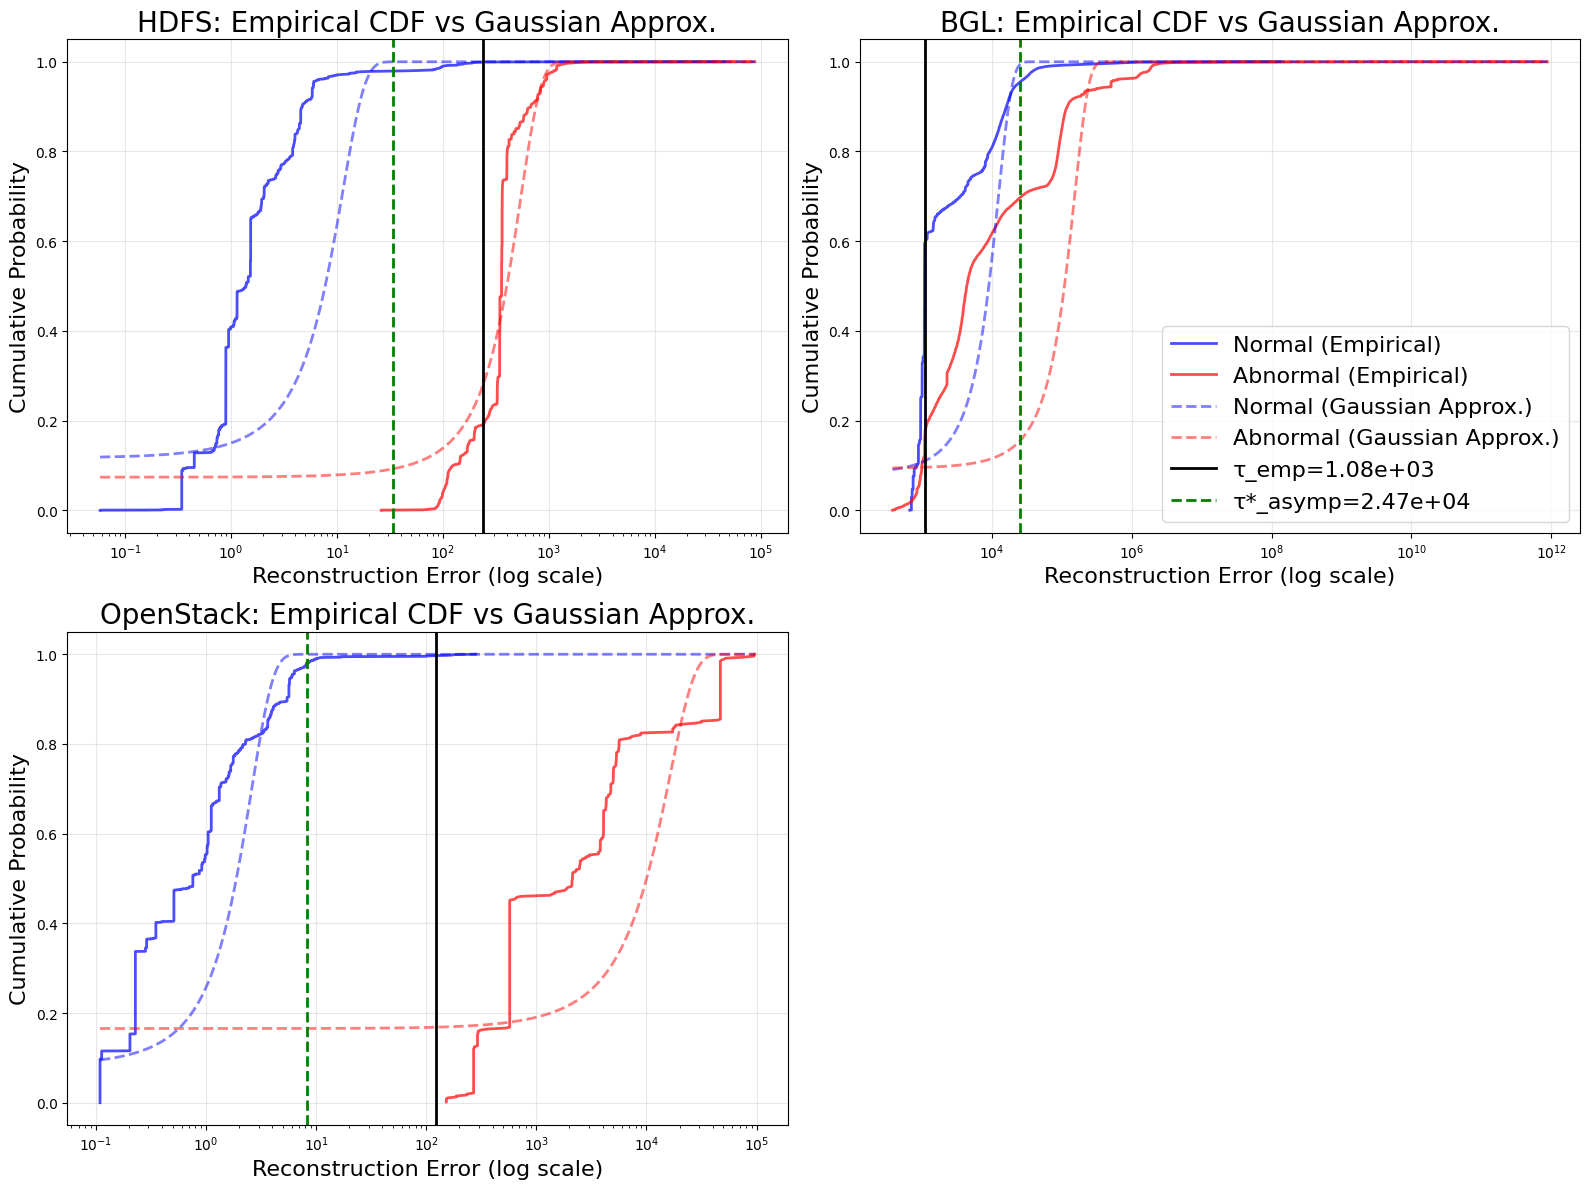


Plot saved as 'reconstruction_error_analysis.pdf' (optimized for LaTeX)


In [37]:
# Calculate reconstruction errors for visualization
errors_hdfs = reconstruction_error(X_test_hdfs, R_hdfs, mean_hdfs)
errors_normal_hdfs = errors_hdfs[y_test_hdfs == 0]
errors_abnormal_hdfs = errors_hdfs[y_test_hdfs == 1]

errors_bgl = reconstruction_error(X_test_bgl, R_bgl, mean_bgl)
errors_normal_bgl = errors_bgl[y_test_bgl == 0]
errors_abnormal_bgl = errors_bgl[y_test_bgl == 1]

errors_openstack = reconstruction_error(X_test_openstack, R_openstack, mean_openstack)
errors_normal_openstack = errors_openstack[y_test_openstack == 0]
errors_abnormal_openstack = errors_openstack[y_test_openstack == 1]

# Create a 2x2 grid (4 axes, but we only use the first 3)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()


datasets = [
    ('HDFS', errors_hdfs, errors_normal_hdfs, errors_abnormal_hdfs, tau_hdfs, tau_asymptotic_hdfs, y_test_hdfs, X_cal_hdfs, y_cal_hdfs, R_hdfs),
    ('BGL', errors_bgl, errors_normal_bgl, errors_abnormal_bgl, tau_bgl, tau_asymptotic_bgl, y_test_bgl, X_cal_bgl, y_cal_bgl, R_bgl),
    ('OpenStack', errors_openstack, errors_normal_openstack, errors_abnormal_openstack,
     tau_openstack, tau_asymptotic_openstack, y_test_openstack, X_cal_openstack, y_cal_openstack, R_openstack),
]

for idx, (name, errors_all, errors_normal, errors_abnormal, tau, tau_asymptotic, y_test, X_cal, y_cal, R) in enumerate(datasets):
    ax = axes[idx]

    # ---- Empirical CDFs ----
    errors_normal_sorted = np.sort(errors_normal)
    errors_abnormal_sorted = np.sort(errors_abnormal)

    cdf_normal = np.arange(1, len(errors_normal_sorted) + 1) / len(errors_normal_sorted)
    cdf_abnormal = np.arange(1, len(errors_abnormal_sorted) + 1) / len(errors_abnormal_sorted)

    ax.plot(errors_normal_sorted, cdf_normal, color='blue', linewidth=2,
            label='Normal (Empirical)', alpha=0.7)
    ax.plot(errors_abnormal_sorted, cdf_abnormal, color='red', linewidth=2,
            label='Abnormal (Empirical)', alpha=0.7)

    # ---- Gaussian Approximation CDFs ----
    mu1_p, mu2_p, sigma1_p, sigma2_p = compute_gaussian_mixture_parameters(
        X_cal, y_cal, R
    )

    from scipy import stats

    x_range = np.logspace(
        np.log10(min(errors_normal.min(), errors_abnormal.min())),
        np.log10(max(errors_normal.max(), errors_abnormal.max())),
        1000
    )

    cdf_gaussian_normal = stats.norm.cdf(x_range, loc=mu1_p, scale=sigma1_p)
    cdf_gaussian_abnormal = stats.norm.cdf(x_range, loc=mu2_p, scale=sigma2_p)

    ax.plot(x_range, cdf_gaussian_normal, linestyle='--', linewidth=2,
            color='blue', label='Normal (Gaussian Approx.)', alpha=0.5)

    ax.plot(x_range, cdf_gaussian_abnormal, linestyle='--', linewidth=2,
            color='red', label='Abnormal (Gaussian Approx.)', alpha=0.5)

    # ---- Thresholds ----
    ax.axvline(tau, color='black', linestyle='-', linewidth=2,
               label=f'τ_emp={tau:.2e}')

    if tau_asymptotic is not None:
        ax.axvline(tau_asymptotic, color='green', linestyle='--', linewidth=2,
                   label=f'τ*_asymp={tau_asymptotic:.2e}')

    # ---- Formatting ----
    ax.set_xscale('log')
    ax.set_xlabel('Reconstruction Error (log scale)', fontsize=16)
    ax.set_ylabel('Cumulative Probability', fontsize=16)
    ax.set_title(f'{name}: Empirical CDF vs Gaussian Approx.', fontsize=20)
    ax.grid(alpha=0.3)

    # Only first subplot shows legend
    if idx == 1:
        ax.legend(fontsize=16, loc='best', ncol=1)
        
axes[3].axis('off')

plt.tight_layout()
plt.savefig('reconstruction_error_analysis.pdf', format='pdf', bbox_inches='tight')
plt.show()

print("\nPlot saved as 'reconstruction_error_analysis.pdf' (optimized for LaTeX)")